# Tests

## Example 1: Simple

In [2]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from flowstar.reachability import Reach
from flowstar.poly import Poly
from lbuc import *

In [3]:
kwargs = {
    'symbolic_composition': True,
}

In [4]:
R.<t,x,y> = RIF[]

In [5]:
TM_ORDER = 10
UNPRECONDITIONING_ORDER = 10

In [6]:
odes = [
    R(1),
    -y,
    x,
]
initials = [(0,0), (4,5), (1,2)]
system = System(
    R,
    [t, x, y],
    initials,
    odes,
)
reach = system.reach(2*pi, step=0.8, order=TM_ORDER,
              precompose_taylor_models=False,
              unpreconditioning_order=UNPRECONDITIONING_ORDER,
              symbolic_composition=False)
reach_superfine = system.reach(2*pi, step=0.01, order=TM_ORDER,
              precompose_taylor_models=False,
              symbolic_composition=False)

In [7]:
k_possibilities = [4 + x for x in srange(0, 1, 0.1, include_endpoint=True)]
k_possibilities

[4.00000000000000,
 4.10000000000000,
 4.20000000000000,
 4.30000000000000,
 4.40000000000000,
 4.50000000000000,
 4.60000000000000,
 4.70000000000000,
 4.80000000000000,
 4.90000000000000,
 5.00000000000000]

In [31]:
k_possibilities = [4.8]

In [32]:
reach_points = [system.with_y0([(0,0), (k), (1 + k - 4)]).reach(2*pi, step=0.01, order=TM_ORDER,
              precompose_taylor_models=False,
              symbolic_composition=False)
    for k in k_possibilities]
reach_bands = [system.with_y0([(0,0), (4 + k, 4.1 + k), (1 + k, 1.1 + k)]).reach(2*pi, step=0.01, order=TM_ORDER,
               precompose_taylor_models=False,
               symbolic_composition=False)
     for k in srange(0, 1, 0.1, include_endpoint=False)]

In [33]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [34]:
reach.res

2

In [35]:
S = Atomic(y); S

Atomic(y)

In [36]:
#S = Atomic(7 - (x + 1)**2 + y + x); S

In [37]:
#S = Atomic(3 - y**2 + y); S

In [38]:
# Very Weird S
#S = Atomic(3 - y**2 + y + x**5 + x**3*y**6); S

PolyObserver(y, <flowstar.reachability.Reach object at 0x7f7446e1bdc0>, x, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = x


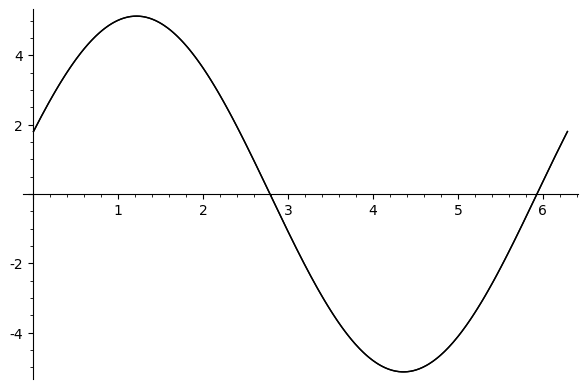

In [39]:
p_points = sum([
    S.sage_plot(r, symbolic_composition=False,
                color=('black', 'black'),
                fillcolor=('black',))
    for r in reach_points
], Graphics())
# p_points += sum([
#     S.sage_plot(r, symbolic_composition=False,
#                 color=('grey', 'grey'),
#                 fillcolor=('grey',))
#     for r in reach_bands
# ], Graphics())
p_points

PolyObserver(y, <flowstar.reachability.Reach object at 0x7f7446e1b3a0>, x, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = x


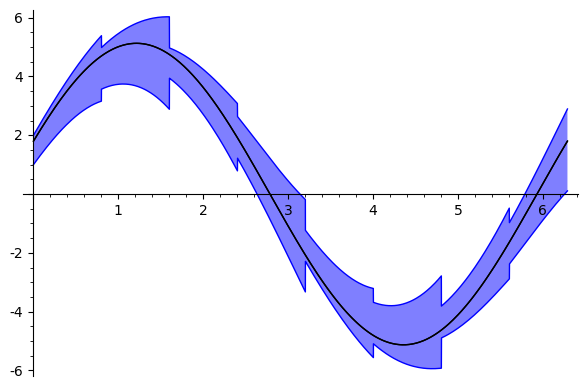

In [40]:
p1 = S.sage_plot(reach,
    #color=('red', 'red'),
    #fillcolor=('red',)
); p1 + p_points

In [41]:
(p1 + p_points).save("/home/twright/Documents/PhD/Notebooks/images/tm-segs.pdf")

In [19]:
SYMBOLIC_COMPOSITION_ORDER = 10

PolyObserver(y, <flowstar.reachability.Reach object at 0x7f19bae53ca0>, x, symbolic_composition=True, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = x


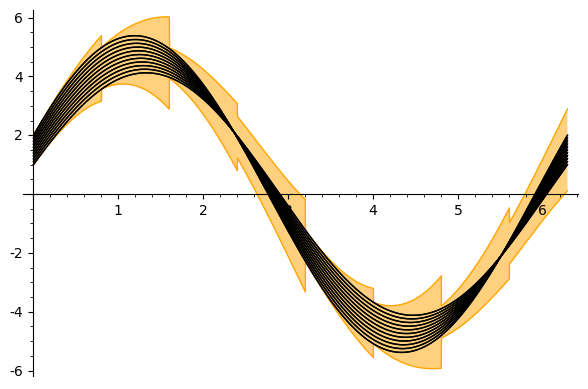

In [30]:
p2 = S.sage_plot(
    reach, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    color=('orange', 'orange'),
    fillcolor=('orange',),
)
p2 + p_points

In [38]:
reach.instrumentor.print()

ran "restoring globals" 11900 times in 0.10967159271240234
ran "Running Flow*" 1 times in 0.005408763885498047
ran "capturing globals [on exit]" 11900 times in 0.07410836219787598
ran "prepare" 1 times in 0.00010061264038085938
ran "composing flowpipe" 8 times in 0.004678249359130859
ran "compose_interval_fn for atomic" 5659 times in 0.022760868072509766
ran "returning cached composed flowpipe" 11881 times in 0.02653789520263672
ran "observable_hf" 8 times in 0.001161336898803711
ran "symbolic composition already done" 6222 times in 0.012764692306518555


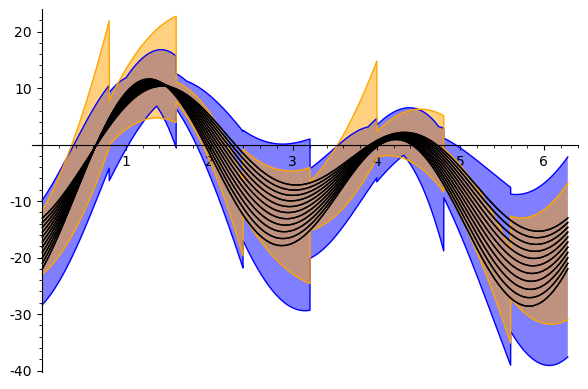

In [39]:
p1+p2+p_points

In [40]:
SELECTIVE_UNPRECONDITIONING = True

In [41]:
from functools import reduce

PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7ff666d9a9d0>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.14 seconds
roots = [[0.62791369907788041 .. 0.67211372988242580], [2.2541501400618710 .. 2.3100000000000090], [3.8934898090739782 .. 3.9568519971006762], [4.6757251763165905 .. 4.7124714978027447]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62791369907788041 .. 0.67211372988242580], 
 [2.2541501400618710 .. 2.3100000000000090], 
 [3.8934898090739782 .. 3.9568519971006762], 
 [4.6757251763165905 .. 4.7124714978027447]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.62791369907788041 .. 0.67211372988242580], 
 [2.2541501400618710 .. 2.3100000000000090], 
 [3.8934898090739782 .. 3.9568519971006762], 
 [4.6757251763165905 .. 4.712471

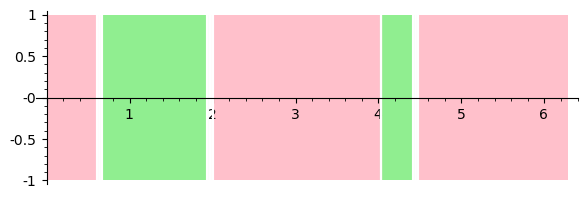

In [42]:
combined_signal = reduce(
    lambda a, b: a & b,
    (S.signal(r, symbolic_composition=False)
     for r in reach_bands),
)
combined_signal.plot()

In [43]:
INCLUDE_DERIVS = None

phi variables sfs = {x, y}
system sfs = System(R, (t, x, y), [0, [4 .. 5], [1 .. 2]], (1, -y, x), varmap=bidict({'t': t, 'x': x, 'y': y}))
Computed 63 flowpipes in 0.04146770003717393 sec
PolyObserver(-x^2 - x + y + 6, <flowstar.reachability.Reach object at 0x7ff665c6c150>, 2*x*y + x + y, symbolic_composition=False, symbolic_composition_order=2, tentative_unpreconditioning=True, mask=None)
fprime = 2*x*y + x + y
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.45096500683837437 .. 0.84116964364295533], [1.8999999999999959 .. 2.3790557924748393], [3.6858498226790512 .. 4.2455090593679997], [4.2999999999999758 .. 4.7181223820180707]]
domain = [0.0000000000000000 .. 6.2851853071795869]
roots = [[0.45096500683837437 .. 0.84116964364295533], 
 [1.8999999999999959 .. 2.3790557924748393], 
 [3.6858498226790512 .. 4.2455090593679997], 
 [4.2999999999999758 .. 4.7181223820180707]]
seg_domain = [0.0000000000000000 .. 6.28518530717

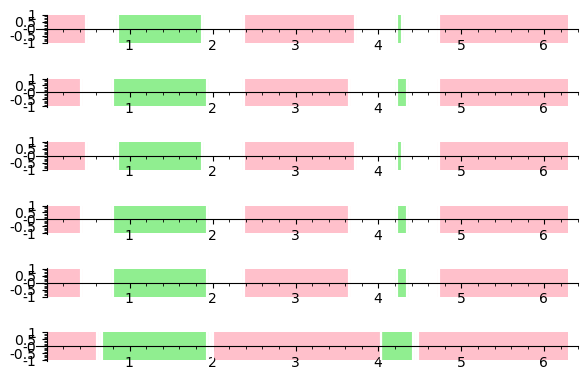

In [46]:
sig1 = S.signal_for_system(system, 2*pi, symbolic_composition=False,
    selective_unpreconditioning=False,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    unpreconditioning_include_derivs=INCLUDE_DERIVS,
    print_timings=True)
sig2 = S.signal_for_system(
    system, 2*pi, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    selective_unpreconditioning=False,
    unpreconditioning_include_derivs=INCLUDE_DERIVS,
    print_timings=True
)
sig3 = S.signal_for_system(system, 2*pi, symbolic_composition=False,
    selective_unpreconditioning=True,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    selective_unpreconditioning_include_derivs=INCLUDE_DERIVS,
    print_timings=True)
sig4 = S.signal_for_system(
    system, 2*pi, symbolic_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    selective_unpreconditioning=True,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    unpreconditioning_include_derivs=INCLUDE_DERIVS,
    print_timings=True
)
sig5 = S.signal_for_system(
    system, 2*pi, symbolic_composition=True,
    upfront_composition=True,
    symbolic_composition_order=SYMBOLIC_COMPOSITION_ORDER,
    selective_unpreconditioning=True,
    unpreconditioning_order=UNPRECONDITIONING_ORDER,
    unpreconditioning_include_derivs=INCLUDE_DERIVS,
    print_timings=True
)


g = graphics_array([
    sig1.plot(),
    sig2.plot(),
    sig3.plot(),
    sig4.plot(),
    sig5.plot(),
    combined_signal.plot(),
], ncols=1)
g.show(aspect_ratio=1/6)

In [24]:
sig1

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.45096500683837438], False), ([0.84116964364295532 .. 1.8999999999999960], True), ([2.3790557924748392 .. 3.6858498226790513], False), ([4.2455090593679996 .. 4.2999999999999759], True), ([4.7181223820180706 .. 6.2831853071795872], False)], mask=None)

In [25]:
sig2

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.42781876372057959], False), ([0.80791763794276305 .. 1.9408154388129713], True), ([2.3532033084119623 .. 3.6723543708094635], False), ([4.2000000000000046 .. 4.2556841157080845], True), ([4.3000000000000051 .. 4.3510778392460630], True), ([4.7370139187454896 .. 6.2831853071795872], False)], mask=None)